In [1]:
from keras.datasets import cifar10
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',pooling='avg',classes=y_train.shape[1])

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.UpSampling2D())
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 100s 56ms/step - loss: 1.2695 - accuracy: 0.5637 - val_loss: 0.6102 - val_accuracy: 0.8018
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.5348 - accuracy: 0.8354 - val_loss: 0.4432 - val_accuracy: 0.8599
Epoch 3/5
1563/1563 [==============================] - 87s 55ms/step - loss: 0.3662 - accuracy: 0.8878 - val_loss: 0.3962 - val_accuracy: 0.8758
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.2680 - accuracy: 0.9192 - val_loss: 0.3840 - val_accuracy: 0.8908
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 0.1986 - accuracy: 0.9395 - val_loss: 0.3580 - val_accuracy: 0.8956


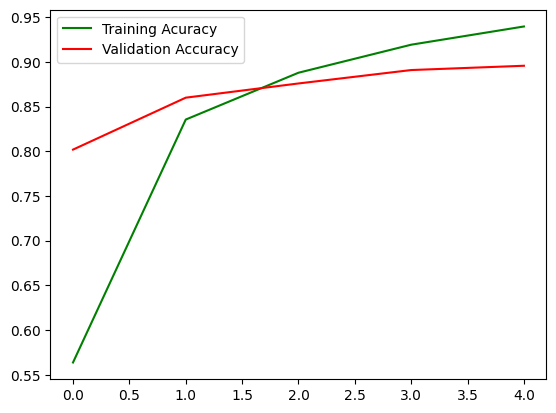

In [12]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

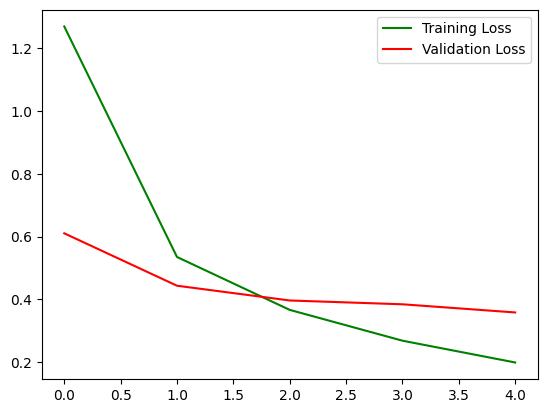

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3580 - accuracy: 0.8956


[0.35801541805267334, 0.8956000208854675]